In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#To read the source file
red_wine=pd.read_csv('winequality-red.csv')
print("Rows,Columns",red_wine.shape)

Rows,Columns (1599, 12)


In [6]:
#Returns first 5 rows
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#Gives the information of the particular data
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#Describes the data present
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


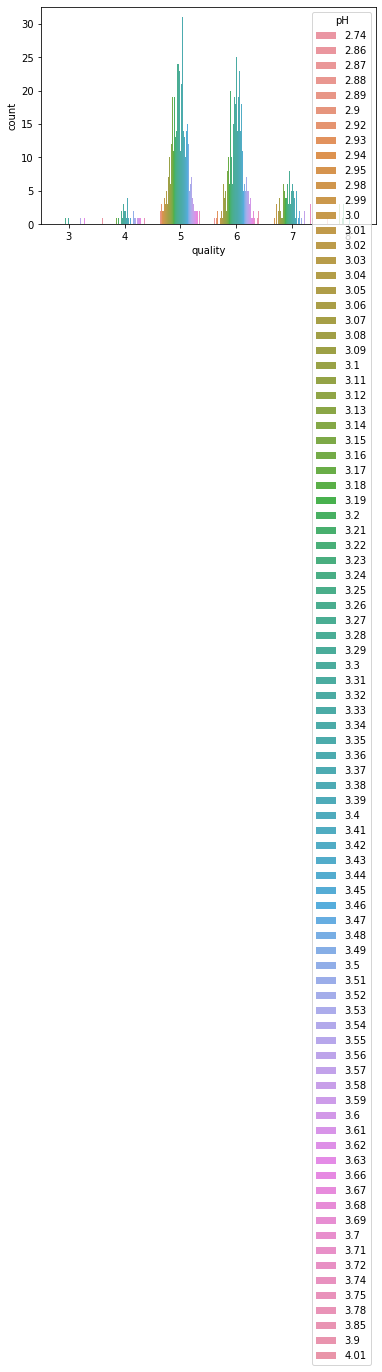

In [9]:
#Checking the quality based on the pH value
sns.countplot(x="quality",hue="pH",data=red_wine)

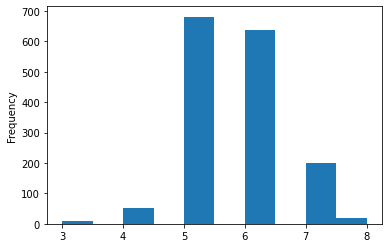

In [10]:
#Plotting the histogram based on the quality
red_wine["quality"].plot.hist()

In [11]:
#Checking for the presence of null values
red_wine.isnull()
#It returns the binary value

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#Finding the sum of null values present
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Converting to classification problem**

In [57]:
#Let us assume that particular wine is of good quality if it's quality remains above 6 out of 10
red_wine['goodquality'] = [1 if x >= 6 
                            else 0 for x in red_wine['quality']]

In [58]:
#Separating dependent and independent varibles
X = red_wine.drop(['quality','goodquality'], axis = 1)
y = red_wine['goodquality']

In [59]:
#Checking the number of wines that are of 'Good Quality'
red_wine['goodquality'].value_counts()

1    855
0    744
Name: goodquality, dtype: int64

In [ ]:
**It indicates that out of 1599 wines that are being described above, 855 wines are of good quality.

In [60]:
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [61]:
#Now we have train and test the data to determine their effectiveness
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

**Decision tree**

In [62]:
#Importing the libraries necessary to implement model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [63]:
#Assigning a value to a variable
dec_Tree=DecisionTreeClassifier(random_state=1)
dec_Tree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [64]:
#Prediction
pred=dec_Tree.predict(X_test)

In [68]:
#It displays the prediction for this data using decision tree model
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       185
           1       0.76      0.80      0.78       215

    accuracy                           0.76       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.76      0.76      0.76       400



In [66]:
#Displaying consfusion matrix
print(confusion_matrix(y_test,pred))

[[131  54]
 [ 43 172]]


**Random Forest** **Classifier**

In [67]:
#Importing libraries
from sklearn.ensemble import RandomForestClassifier

In [69]:
#Assigning the values
rfc_model = RandomForestClassifier(random_state=1)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [70]:
pred2 = rfc_model.predict(X_test)

In [57]:
#Prediction
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       185
           1       0.80      0.84      0.82       215

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



In [71]:
print(confusion_matrix(y_test,pred2))

[[138  47]
 [ 36 179]]


**Support Vector Machine** 

In [44]:
from sklearn.svm import SVC

In [45]:
model = SVC()

In [46]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
svc_predictions = model.predict(X_test)

In [48]:
print(confusion_matrix(y_test,svc_predictions))

[[130  55]
 [ 44 171]]


In [49]:
print((classification_report(y_test,svc_predictions)))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       185
           1       0.76      0.80      0.78       215

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



**DECISION TREE**

In [34]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [38]:
features=list(red_wine.columns[1:])

In [39]:
feat=features.remove('goodquality')

In [40]:
dot_data = StringIO()  
export_graphviz(dec_Tree, out_file=dot_data,feature_names=feat,filled=True,rounded=True)

In [41]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Output hidden; open in https://colab.research.google.com to view.

In [52]:
##Final model selection
#Random Forest seems to have highest precision for this case
from sklearn import ensemble

In [53]:
gbc = ensemble.RandomForestClassifier()
gbc.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)